# Dataset - Students Performance in Exams
Marks secured by the students in various subjects

## Content
This data set consists of the marks secured by the students in various subjects.

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## 1.Import the CSV data as Pandas Dataframe

In [53]:
df = pd.read_csv('./data/StudentsPerformance.csv')

## 2.Show top 5 records

In [54]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3. Data Checks to perform

1. Check for the missing values
2. Check for Duplicates
3. Check the data types
4. Check the number of unique values in each column
5. Check the statics of the dataset
6. Check various categories present in the different categorical column

# 3.1 Check missing values

In [55]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

output - 
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

inference - no missing values in the dataset

## 3.2 Check for duplicates

In [56]:
df.duplicated().sum()
print(df.duplicated().sum())

0


inference - no duplicates in the dataset

## 3.3 Check for the data types
1. Check null types
2. Check dtypes

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Check number of unique values in each column

In [58]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## 3.5 Check statistics for the dataset

In [59]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


inference - 3 numerical features - math score, reading score, writing score

1. from bove desciption of numerical data, all means are very close to each other - between 66 & 68.05
2. all standard deviations are also close - between 14.6 to 15.19
3. while there is a maximum score 0 for math , for writing minimum is much higher - 10 & for reading mynet higher - 17

## 3.7. Exploring data

In [60]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [61]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [62]:
print("categories in gender column : ", end="")
print(df['gender'].unique())

print("categories in race/ethnicity' column : ", end="")
print(df['race/ethnicity'].unique())

print("categories in parental level of education column : ", end="")
print(df['parental level of education'].unique())

print("categories in lunch column : ", end="")
print(df['lunch'].unique())

print("categories in test preparation course column : ", end="")
print(df['test preparation course'].unique())

categories in gender column : ['female' 'male']
categories in race/ethnicity' column : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education column : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch column : ['standard' 'free/reduced']
categories in test preparation course column : ['none' 'completed']


In [63]:
# define categorical & numerical features/columns
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features : {}".format(len(categorical_features), categorical_features))


We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## 3.8 Adding columns for "Total Score" & "Average"

1. adding new column - total_score which is the sum of all 3 numerical features : ['math score', 'reading score', 'writing score']
2. adding a new column - average - total_score/3

to keep the track of total score and average of the dataset

hence these 2 new columns can be used as output features for our model to predict the total_score / avergae
the 3 numerical features : ['math score', 'reading score', 'writing score'] are now optional to keep in the dataset

In [64]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [65]:
reading_full = df[df['reading score'] == 100]['avergae_score'].count()
writing_full = df[df['writing score'] == 100]['avergae_score'].count()
math_full = df[df['math score'] == 100]['avergae_score'].count()

print(f"Number of students with full marks in Maths : {math_full}")
print(f"Number of students with full marks in writing : {writing_full}")
print(f"Number of students with full marks in reading : {reading_full}")

KeyError: 'avergae_score'

In [ ]:
reading_less_20 = df[df['reading score'] <= 20]['avergae_score'].count()
writing_less_20 = df[df['writing score']  <= 20]['avergae_score'].count()
math_less_20 = df[df['math score']  <= 20]['avergae_score'].count()

print(f"Number of students with less than 20 marks in Maths : {math_less_20}")
print(f"Number of students with less than 20 marks in writing : {writing_less_20}")
print(f"Number of students with less than 20 marks in reading : {reading_less_20}")

Number of students with less than 20 marks in Maths : 4
Number of students with less than 20 marks in writing : 3
Number of students with less than 20 marks in reading : 1


inference - 
1. from above values we get students that have performed worst in maths
2. best performance is in reading section.

## 4. Exploring data (visaulaiztion)

## 4.1  Visualize average score distribution to make some conclusion
1. Histograms
2. Kernel Distribution Function(KDE)

## 4.1.1 Historgams & KDE

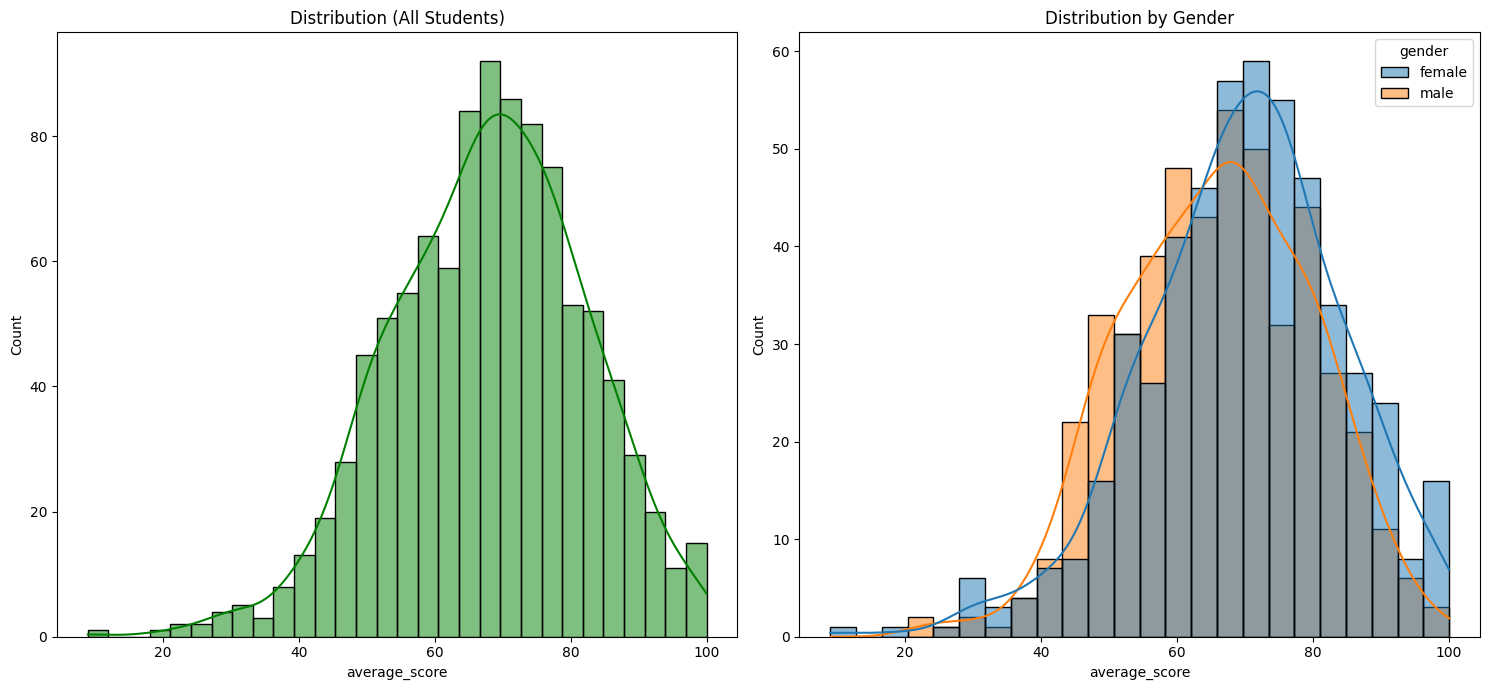

In [ ]:
# Histogram Plot to see the distrbution of average score for all students and based on gender 

# Use plt.subplots() to get the figure and axes objects
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Use the first axis (axs[0]) and call seaborn with the 'ax' argument
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution (All Students)') # Set title using the axis method

# Plot 2: Use the second axis (axs[1]) and call seaborn with the 'ax' argument
sns.histplot(data=df, x='average_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution by Gender') # Set title using the axis method

# Optional: Improve layout
plt.tight_layout()

# Display the plots
plt.show()

inference - 
1. Female students performed better than male students.

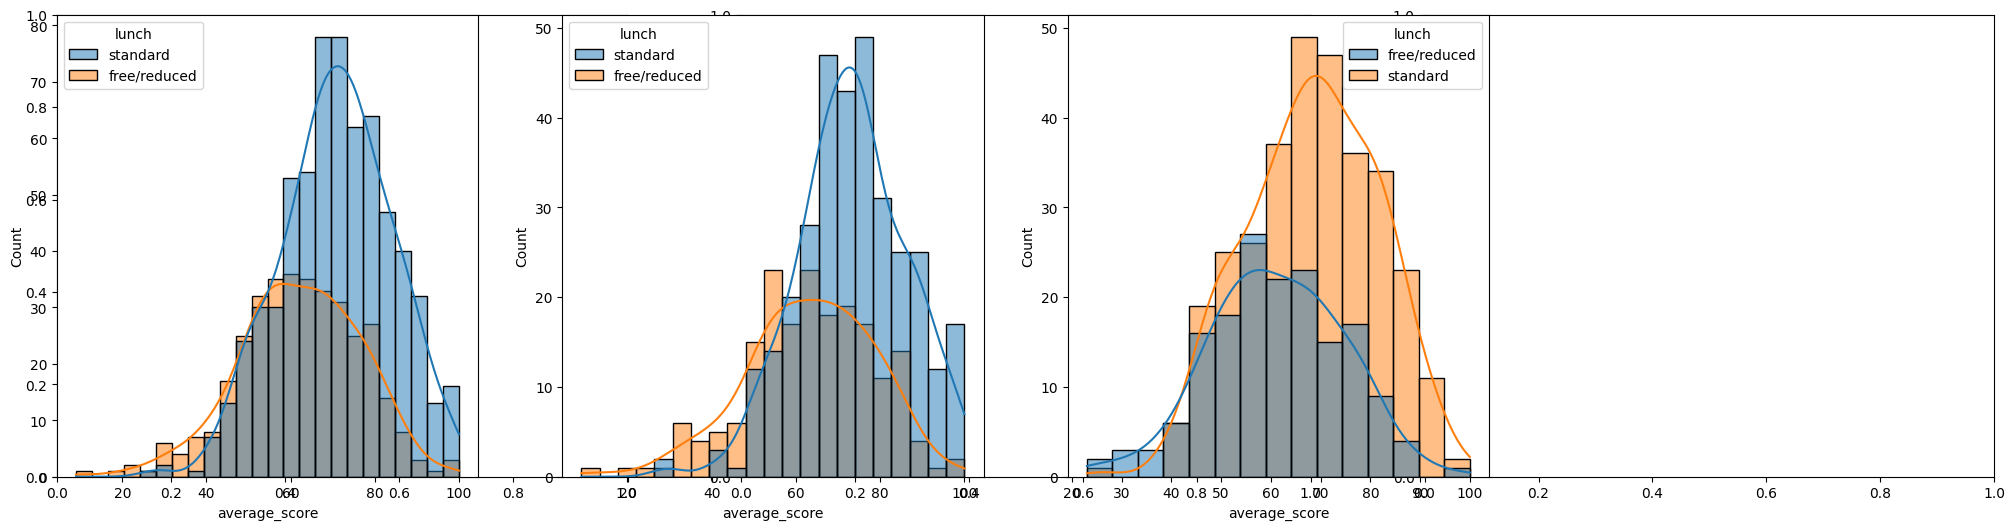

In [ ]:
# compare the distribution of average_score based on the lunch category, segregated by gender.

# Use plt.subplots() to get the figure and axes objects
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x='average_score', kde=True, hue='lunch')

# Optional: Improve layout
plt.tight_layout()

# Display the plots
plt.show()

inference -
1. Standard lunch helps perform well in exams
2. Standard lunch helps perform well in exams be it males / females

## Univariate Analysis of Numerical Values

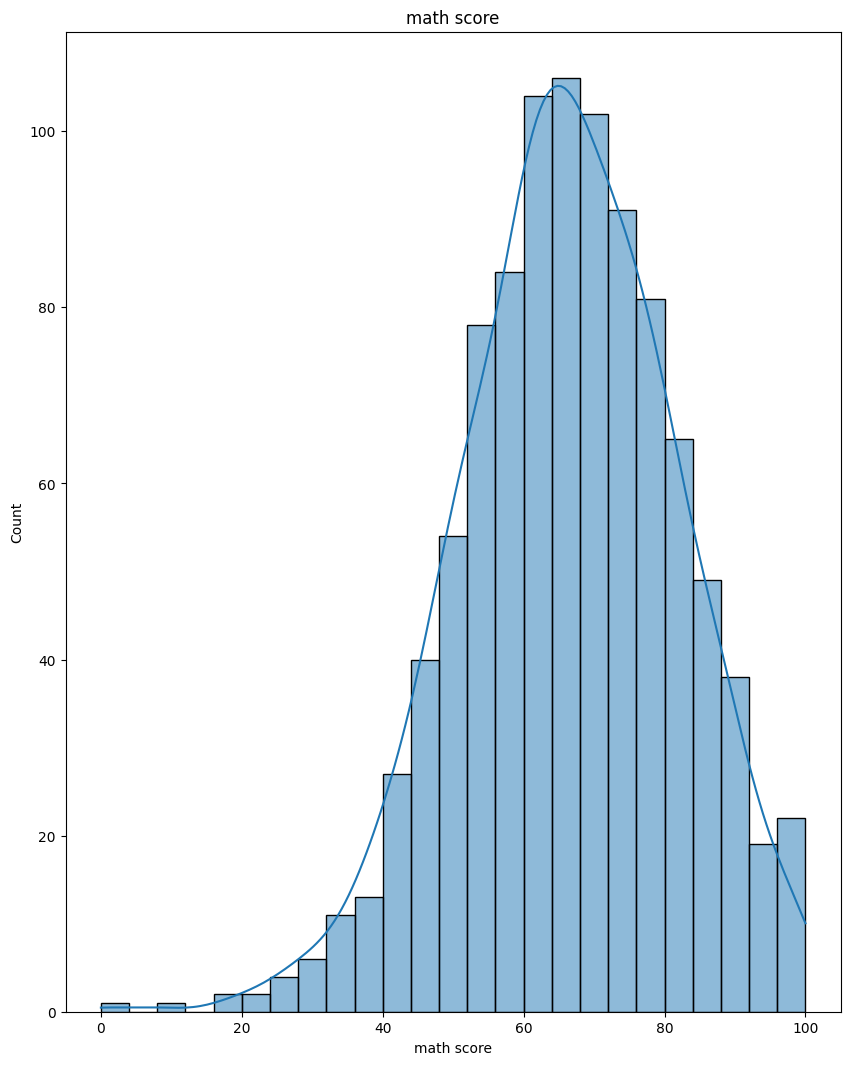

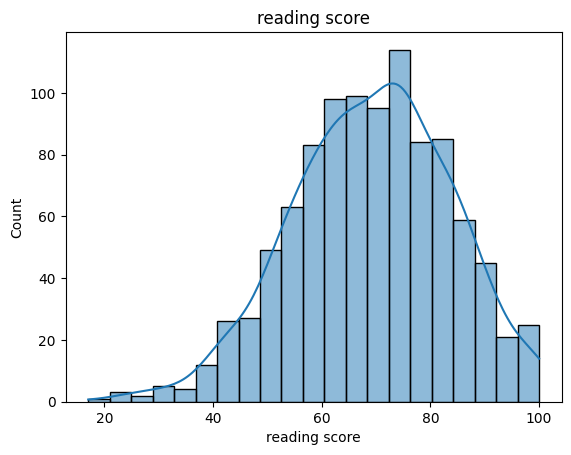

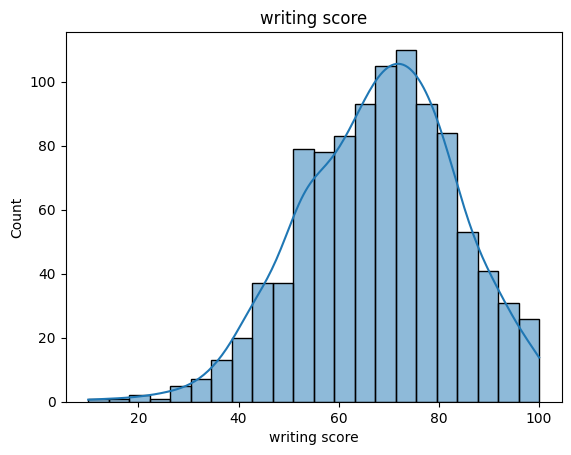

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.99, bottom = 0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numeric_features:
    sns.histplot(data = df , x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()